# Beer Recommendation Assignment - Shailesh

## To build a recommendation system using collaborative filtering, where customers will be recommended the beer that they are most likely to buy using given dataset of half million beer reviews.

## Step 1 - Reading and Understanding the Data

In [1]:
#supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
# Import the Beer Dataset
beer_dataset = pd.read_csv("beer_data.csv")

In [3]:
#Check the Top records
beer_dataset.head(5)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [5]:
# Check the Info of the Dataframe
beer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [6]:
# Check the Size of the data
beer_dataset.shape

(475984, 3)

## Step 2 - Data cleaning

### Check for Duplicates

In [8]:
#Check for Duplicates
clean_dataset = beer_dataset.drop_duplicates(subset=['beer_beerid', 'review_profilename'], keep='last')
clean_dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [9]:
#Check the Size of the Dataframe after Dropping Duplicates
clean_dataset.shape

(474560, 3)

### Removing nulls

In [10]:
#Check the Null Percentages
(round(100*(clean_dataset.isnull().sum()/len(clean_dataset.index)), 2)).sort_values(ascending = False)

review_profilename    0.02
review_overall        0.00
beer_beerid           0.00
dtype: float64

In [11]:
#Retain the Notnull columns
clean_dataset = clean_dataset[pd.notnull(clean_dataset['review_profilename'])]

In [12]:
#Check the percentages of nulls
(round(100*(clean_dataset.isnull().sum()/len(clean_dataset.index)), 2)).sort_values(ascending = False)

review_overall        0.0
review_profilename    0.0
beer_beerid           0.0
dtype: float64

In [13]:
#Examine the Dataframe
clean_dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [14]:
#Create a Backup Dataframe
beerreviews_ds = clean_dataset 
userreviews_ds = clean_dataset

In [15]:
#Examine the Backup Dataframe
beerreviews_ds.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


## Step 3 - Data Preparation

### Lets find all distinct beers & total reviews they received

In [16]:
#Distinct Beers
beerreviews_ds= beerreviews_ds.groupby('beer_beerid').size().sort_values(ascending = False).reset_index(name="reviewcount")

In [19]:
#Check the Max Reviewcount
beerreviews_ds.head(5)

,beer_beerid,reviewcount
0,2093,977
1,412,966
2,1904,902
3,1093,840
4,92,812


### Beer Id 2093 has got highest review count among 1 to 987

In [20]:
#Check the Shape of the Dataframe
beerreviews_ds.shape

(40304, 2)

### Lets find total reviews made by each user

In [21]:
#Total Reviews
userreviews_ds= userreviews_ds.groupby('review_profilename').size().sort_values(ascending = False).reset_index(name="NoofBeersReviewd")
userreviews_ds.head()

,review_profilename,NoofBeersReviewd
0,northyorksammy,1842
1,mikesgroove,1373
2,BuckeyeNation,1336
3,Thorpe429,1072
4,ChainGangGuy,1046


### northyorksammy has made highest reviews of 1842

In [22]:
userreviews_ds.shape

(22497, 2)


## Step 3a - Choose only those beers that have at least N number of reviews

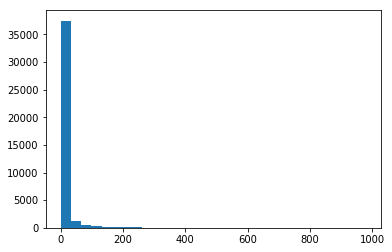

In [25]:
#Review Count
import matplotlib.pyplot as plt

x = beerreviews_ds.reviewcount
plt.hist(x, bins = 30)
plt.show()

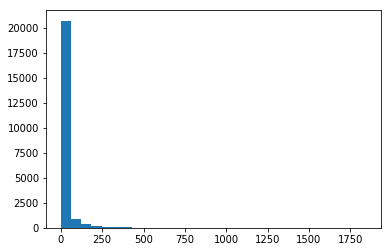

In [26]:
x = userreviews_ds.NoofBeersReviewd
plt.hist(x, bins = 30)
plt.show()

### Filtering by beers having atleast 50 reviews & users having reviewed atleast 30 beers

In [27]:
# More than 50 reviews
beerreviews_ds = beerreviews_ds[beerreviews_ds.reviewcount >= 50]
beerreviews_ds.shape

(2064, 2)

In [29]:
# More than 30 reviews
userreviews_ds = userreviews_ds[userreviews_ds.NoofBeersReviewd >= 30]
userreviews_ds.shape

(3176, 2)

In [30]:
#Merge the Datasets
RequiredBeer = pd.merge(clean_dataset, beerreviews_ds, on='beer_beerid')
RequiredBeer.shape

(295997, 4)

In [31]:
#Merge the Datasets
RequiredBeer = pd.merge(RequiredBeer, userreviews_ds, on='review_profilename')
RequiredBeer.shape

(230088, 5)

In [32]:
#Examine the Dataframe
RequiredBeer.head()

,beer_beerid,review_profilename,review_overall,reviewcount,NoofBeersReviewd
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [33]:
#Examine the Dataframe
RequiredBeer.describe()

,beer_beerid,review_overall,reviewcount,NoofBeersReviewd
count,230088.000000,230088.000000,230088.000000,230088.000000
mean,15773.718295,3.869526,233.838583,233.050581
std,18910.919154,0.678383,185.349133,229.966623
min,5.000000,1.000000,50.000000,30.000000
25%,1089.000000,3.500000,97.000000,78.000000
50%,4161.000000,4.000000,171.000000,155.000000
75%,29619.000000,4.500000,314.000000,299.000000
max,75086.000000,5.000000,977.000000,1842.000000


## Step 4 - Data exploration

### Unique values of ratings

In [34]:
#Check the Unique Ratings
RequiredBeer.review_overall.unique()

array([ 3. ,  4. ,  5. ,  3.5,  2.5,  4.5,  2. ,  1. ,  1.5])

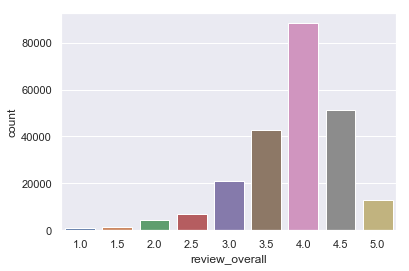

In [37]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="review_overall", data=RequiredBeer)
plt.show()

### So rating 4.0 & 4.5 are most common, 1.0 & 1.5 are least common.


### The average beer ratings

In [38]:
#Average Rating
averagebeerrating = RequiredBeer.groupby('beer_beerid')['review_overall'].mean().reset_index(name="AvgRating")
averagebeerrating.head()

,beer_beerid,AvgRating
0,5,3.532609
1,6,3.707895
2,7,3.275510
3,10,3.859116
4,14,3.911765


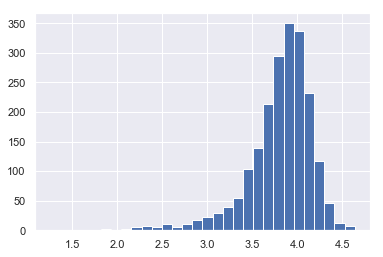

In [40]:
#Plot the Average Ratings
x = averagebeerrating.AvgRating
plt.hist(x, bins = 30)
plt.show()


### Average Rating of the Users

In [41]:
#Average Rating
averageuserrating = RequiredBeer.groupby('review_profilename')['review_overall'].mean().reset_index(name="AvgRating")
averageuserrating.head()

,review_profilename,AvgRating
0,0110x011,4.333333
1,05Harley,4.116667
2,100floods,4.155172
3,1759Girl,3.725000
4,1fastz28,3.875000


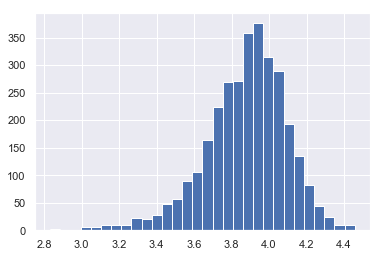

In [43]:
#Display the Average Rating
x = averageuserrating.AvgRating
plt.hist(x, bins = 30)
plt.show()

### The average number of ratings given to the beers

In [44]:
#Average Rating
averagenoofbeerratings = len(RequiredBeer.review_overall)/len(RequiredBeer.beer_beerid.unique())
print(averagenoofbeerratings)

111.47674418604652


### Average rating by Users

In [45]:
averagenoofuserratings = len(RequiredBeer.review_overall)/len(RequiredBeer.review_profilename.unique())
print(averagenoofuserratings)

72.44584382871537


## Step 5 - Recommendation Models

### Divide data into training and testing dataset

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(RequiredBeer, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(161061, 5)
(69027, 5)


In [47]:
# pivot ratings into movie features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [48]:
#Check the Datafrane
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [49]:
dummy_train = train.copy()
dummy_test = test.copy()

In [50]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [51]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [52]:
#Check the Dataframe
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [53]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User Similarity Matrix

### Using adjusted Cosine 

In [54]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [55]:
#Normalizing the Mean
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.414286,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.414286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [56]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.06414558 ...,  0.          0.04680322  0.        ]
 [ 0.          1.         -0.00228504 ..., -0.05790255  0.05861326  0.        ]
 [-0.06414558 -0.00228504  1.         ..., -0.03519429  0.00315277  0.        ]
 ..., 
 [ 0.         -0.05790255 -0.03519429 ...,  1.          0.          0.        ]
 [ 0.04680322  0.05861326  0.00315277 ...,  0.          1.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]


In [57]:
#Make the Corelation Matrix to 0
user_correlation[user_correlation<0]=0
user_correlation

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.04680322,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.05861326,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.00315277,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.04680322,  0.05861326,  0.00315277, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [58]:
#Find the Dot Product of the Matrices
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[ 0.67999299,  1.77079317,  1.35230327, ...,  0.62420766,
         2.77956349,  1.01753875],
       [ 1.69448123,  2.246446  ,  0.89895223, ...,  0.77179458,
         1.9692779 ,  0.76003046],
       [ 0.55325883,  1.85846483,  1.01042071, ...,  0.44386907,
         1.59022267,  1.04389225],
       ..., 
       [ 5.33706235,  9.36411322,  6.27876277, ...,  1.13799611,
         2.06166832,  2.44172436],
       [ 1.80665909,  6.58852124,  4.30808409, ...,  1.65837508,
         3.21482799,  2.77229447],
       [ 2.61645489,  5.62901318,  3.91374546, ...,  0.74488608,
         1.25929658,  1.3667631 ]])

In [59]:
user_predicted_ratings.shape

(3176, 2064)

### Determine how similar the first 10 users are to each other and visualise it.

In [60]:
corr_matrix = user_correlation[0:10, 0:10]
corr_matrix

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.02721265,  0.0210426 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07400768],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.03233497,
         0.        ,  0.        ,  0.        ,  0.        ,  0.04449258],
       [ 0.        ,  0.02721265,  0.        ,  1.        ,  0.0423635 ,
         0.        ,  0.19915344,  0.00246996,  0.        ,  0.        ],
       [ 0.        ,  0.0210426 ,  0.03233497,  0.0423635 ,  1.        ,
         0.08483584,  0.01299659,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.08483584,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.19915344,  0.01299659,
         0.        ,  1.        ,  0.        

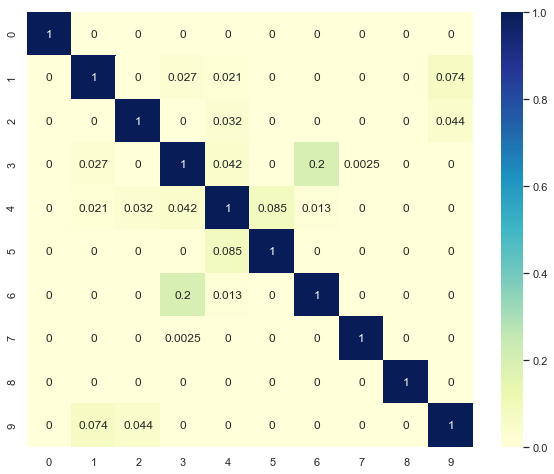

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [63]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.679993,1.770793,1.352303,2.134483,0.370780,0.383256,2.082598,1.958614,2.972901,1.803514,...,3.522723,0.677360,0.327592,0.256338,0.443801,0.549569,0.265532,0.624208,2.779563,1.017539
05Harley,1.694481,2.246446,0.898952,4.611850,1.056115,0.495406,2.204456,2.465143,6.768842,3.215393,...,3.028446,1.633948,1.668268,1.221506,1.361894,0.909313,0.364762,0.771795,1.969278,0.760030
100floods,0.553259,1.858465,1.010421,2.651908,0.525535,0.472663,2.118643,0.485276,5.058826,2.788066,...,2.775574,1.113052,0.920705,0.796652,1.208621,0.436140,0.641971,0.443869,1.590223,1.043892
1759Girl,3.439074,5.971633,5.590699,5.378636,1.463910,1.855757,5.356167,4.414439,14.090628,11.686274,...,8.148309,1.740618,2.680271,1.541792,0.800491,2.042492,0.845469,1.003360,3.966938,2.347744
1fastz28,4.283577,0.000000,4.670519,0.000000,1.722630,2.446708,7.299473,6.025117,17.537115,12.252651,...,6.518971,2.038694,0.000000,2.315876,2.643874,2.142328,1.817952,1.471797,3.516263,3.582325



# Item Based Similarity

In [64]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#Check the Mean
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [66]:
#Find the Subtracted Mean
df_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.210145,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.229592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,0.149606,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.04417014  0.09945946 ...,  0.          0.01526266  0.        ]
 [-0.04417014  1.          0.09375331 ...,  0.08499264  0.003014
   0.01010221]
 [ 0.09945946  0.09375331  1.         ...,  0.00352269  0.0039116
  -0.00323998]
 ..., 
 [ 0.          0.08499264  0.00352269 ...,  1.         -0.00928429
   0.02050357]
 [ 0.01526266  0.003014    0.0039116  ..., -0.00928429  1.         -0.0146978 ]
 [ 0.          0.01010221 -0.00323998 ...,  0.02050357 -0.0146978   1.        ]]


In [68]:
#Make the item Corelation = 0
item_correlation[item_correlation<0]=0
item_correlation

array([[ 1.        ,  0.        ,  0.09945946, ...,  0.        ,
         0.01526266,  0.        ],
       [ 0.        ,  1.        ,  0.09375331, ...,  0.08499264,
         0.003014  ,  0.01010221],
       [ 0.09945946,  0.09375331,  1.        , ...,  0.00352269,
         0.0039116 ,  0.        ],
       ..., 
       [ 0.        ,  0.08499264,  0.00352269, ...,  1.        ,
         0.        ,  0.02050357],
       [ 0.01526266,  0.003014  ,  0.0039116 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.01010221,  0.        , ...,  0.02050357,
         0.        ,  1.        ]])

###  visualise the similarity between the first 10 beers

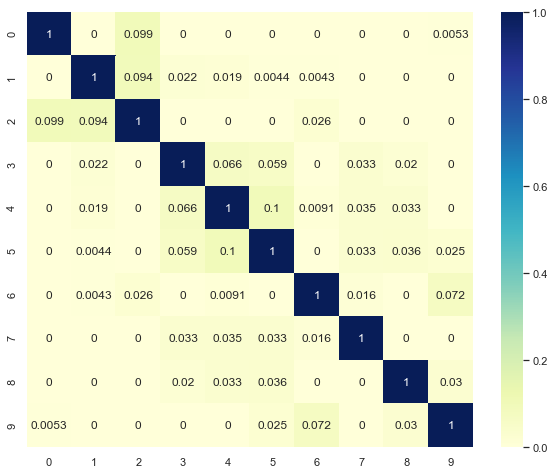

In [69]:
plt.figure(figsize=(10,8))

corr_matrix = item_correlation[0:10, 0:10]
corr_matrix

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

## Prediction Step

In [70]:
#Predicted Rating
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[ 0.35030596,  0.67007409,  0.37240848, ...,  0.49851337,
         0.5400433 ,  0.80865178],
       [ 0.72457996,  0.58433057,  0.70452181, ...,  0.29521526,
         0.98212431,  0.74716183],
       [ 0.46136217,  0.58675006,  0.82374859, ...,  0.19542637,
         1.51768484,  1.22678785],
       ..., 
       [ 1.02796109,  1.68954407,  1.63662981, ...,  0.393883  ,
         0.77566904,  1.67831222],
       [ 1.19684082,  1.48805032,  2.19672634, ...,  1.19824064,
         0.91348182,  1.51614833],
       [ 0.70852628,  0.8646572 ,  1.70585068, ...,  0.22574791,
         0.27230581,  0.48864141]])

In [71]:
#Check the Shape of the Dataframe
item_predicted_ratings.shape

(3176, 2064)

In [72]:
dummy_train.shape

(3176, 2064)

In [74]:
#Multiply the Final Matrices
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head(10)

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.350306,0.670074,0.372408,0.317643,0.481784,0.603947,1.264788,0.339234,1.370695,0.601373,...,1.238484,0.424448,0.409403,0.481816,0.293565,0.674190,0.177647,0.498513,0.540043,0.808652
05Harley,0.724580,0.584331,0.704522,0.844052,1.162971,1.188907,0.379596,0.596851,1.824101,0.669370,...,0.871091,0.192837,0.239378,0.575274,0.399786,0.855636,1.095037,0.295215,0.982124,0.747162
100floods,0.461362,0.586750,0.823749,0.410405,0.327845,0.901703,0.987214,0.348402,1.368677,0.643170,...,0.895754,0.787307,1.027200,0.780403,1.040355,0.430855,1.811650,0.195426,1.517685,1.226788
1759Girl,1.022763,1.240715,1.790379,1.375119,0.718688,1.015299,1.510801,0.593094,1.929402,1.471005,...,0.800078,1.272853,0.995718,1.065855,0.426249,0.889592,1.025931,0.432992,1.055693,1.551725
1fastz28,2.112947,0.000000,3.981665,0.000000,3.247686,3.175278,3.791362,2.633975,2.898742,4.508300,...,2.961354,3.009455,0.000000,1.821015,1.462641,1.690268,2.930784,1.582549,1.554477,4.352531
32hoss32,0.563892,1.132401,1.294743,1.533434,1.085681,1.045365,1.000789,0.617059,0.799513,0.924179,...,0.473506,1.269476,0.523631,0.716250,0.278250,0.710228,0.047910,0.267420,0.411904,0.771144
3Vandoo,0.974143,1.146298,1.024657,1.619889,2.463630,1.099813,1.201751,1.383239,1.402993,2.732318,...,1.190870,0.932687,0.720189,1.205548,0.377036,0.824003,0.758070,1.607204,0.693642,0.856793
4000qtrap,0.503317,1.547165,1.450930,1.145718,0.867087,1.716840,1.005709,0.911121,1.036213,1.222677,...,1.438846,0.683428,0.802369,0.751426,0.687764,0.835379,1.601900,0.912223,0.000000,1.035612
4DAloveofSTOUT,0.581787,0.631722,0.676324,0.885359,0.421783,0.610658,1.120865,0.476252,2.863582,1.122906,...,2.304486,1.141540,1.084675,0.794855,1.489079,0.745594,0.914292,0.590960,0.903927,1.551225


# Evaluation

## Using User Similarity

In [75]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[  1.00000000e+00  -9.94756754e-03   0.00000000e+00 ...,   8.12730982e-04
    4.68916548e-02   0.00000000e+00]
 [ -9.94756754e-03   1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
   -4.99933347e-03   0.00000000e+00]
 ..., 
 [  8.12730982e-04   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.68916548e-02   0.00000000e+00  -4.99933347e-03 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


In [76]:
#Make the user Corelation to 0
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[ 0.55907162,  0.27789291,  0.91628208, ...,  0.54059044,
         2.14354489,  0.19276432],
       [ 0.36529937,  0.41019525,  0.75792938, ...,  1.26628379,
         0.00927267,  0.75379087],
       [ 0.0727323 ,  0.25595152,  0.36327163, ...,  0.11783901,
         0.16140526,  0.01956389],
       ..., 
       [ 1.00533434,  3.25412651,  1.17950817, ...,  1.33881586,
         0.15662638,  1.45608938],
       [ 1.8274427 ,  1.25472844,  1.46314821, ...,  0.61770944,
         1.18221804,  0.34299503],
       [ 0.71590046,  1.05053414,  0.7945771 , ...,  0.        ,
         1.08198966,  0.04651303]])

In [77]:
#Multiply the Final Matrices
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [78]:
#examine the Dataframe
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range

In [79]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>=0]


scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)


MinMaxScaler(copy=True, feature_range=(1, 5))
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [80]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [82]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [83]:
#Print the Final RMSE Score
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.12348330991034247


#### User based RMSE - 0.1234

## Using Item similarity

In [84]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [85]:
test_item_correlation.shape

(2064, 2064)

In [86]:
test_beer_features.shape

(2064, 3174)

In [87]:
#Final Dot Product of the Matrices
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [89]:
#Scale the Dataset
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>=0]


scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [90]:
#Final RMSE Score
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.1446569083002116


#### Item Based RMSE - 0.1446

### Based on RMSE values User Based model is preferred 

In [91]:
user_final_rating.loc['cokes'].sort_values(ascending=False).head()


beer_beerid
412     29.085244
1005    28.023863
1904    27.789703
34      27.785089
4083    27.695402
Name: cokes, dtype: float64

### Top 5 beers recommended to the 'cokes' user - 412, 1005, 1904, 34 and 4083

In [92]:
user_final_rating.loc['genog'].sort_values(ascending=False).head()

beer_beerid
412     31.881006
1093    31.413032
2093    31.176553
131     30.214989
4083    28.673818
Name: genog, dtype: float64

### Top 5 beers recommended to the 'genog' user - 412, 1093, 2093, 131 and 4083

In [93]:
user_final_rating.loc['giblet'].sort_values(ascending=False).head()

beer_beerid
2093    39.590567
412     39.323870
131     37.207630
355     37.203168
92      36.900209
Name: giblet, dtype: float64

### Top 5 beers recommended to the 'giblet' user - 2093, 412, 131, 355 and 92